# Blind Signal Separation (BSS) Problem solved with NMF.
In this exercise, you are given a file named **SoundSourceData.mat**, contained into the folder **data**. You are asked to apply NMF to that problem.$$ $$ 
We want to use NMF to solve the so-called Blind Signal Separation (BSS) Problem. In particular, we will consider the two dimensional case in which we have $m$ sound sources inside a unit disc. The position of the sources are given by the two dimensional vectors$$ $$
$$y^{(1)}=(y_1^{(1)},y_2^{(1)}),y^{(2)}=(y_1^{(2)},y_2^{(2)}),\dots,y^{(m)}=(y_1^{(m)},y_2^{(m)})$$ $$ $$
The emitted sound is collected by a series of $n$ microphones, located at certain coordinates $$ $$
$$x^{(1)}=(x_1^{(1)},x_2^{(1)}),x^{(2)}=(x_1^{(2)},x_2^{(2)}),\dots,x^{(m)}=(x_1^{(m)},x_2^{(m)})$$ $$ $$
positioned at the boundary of the unit disc. $$ $$
Each microphone measures the sound it receives at $p$ different amount of time, and the sound collected by the $l$-th microphone at time $t_i$ is named $b_l(t_i)$.$$ $$
Consider the data matrix $X$ such that $X_{i,j}=b_i(t_j )$, of shape $n×p$. We will suppose that the sound measured by each microphone is corrupted by noise.$$ $$
Both the data matrix $X$ of dimension $n×p$ and the true sound source (in our example, there are $m=4$ sound sources), are collected into the file **SoundSourceData.mat**.$$ $$
1. Import the needed libraries (remember the function **scipy.io.loadmat** to load **.mat** files). $$ $$
2. Use the functions of scipy.io to load the content of **SoundSourceData.mat**, and use it to identify the dataset $X$ and the true sound source matrix $F$. Use those matrix to find the values for $n$ and $p$ in this case (remember that $n×p$ is the shape of $X$).$$ $$
3. To solve convergence problems, set equals to 0 the values contained in $X$ which are strictly negative (those values exists because of the presence of noise).$$ $$
4. Import the utility function NMF contained into the **folder ./utils/NMF.py** and use it to compute the Non-Negative Matrix Factorization for the matrix $X$. Try different values for the number of iterations. Remember that the NMF of a positive matrix $X\in R_+^{n×p}$ is the matrix decomposition $$ $$ $$X=WH\qquad where\;\;W\in R_+^{n×m},H\in R_+^{m×p}$$ $$ $$ that minimizes the error measured in Frobenius norm $$ $$ $$\|X-WH\|_F$$ $$ $$ among the set of positive matrices. $$ $$ Below you will find the documentation on how to use the utility function NMF of NMF.py.$$ $$ *The NMF function takes as input: $$ $$ $\qquad$ X: the data matrix. $$ $$ $\qquad$ m: the number of source (known in advance). $$ $$ $\qquad$ T (optional): the number of iterations of the algorithm. The Default value is T=1000 $$ $$ $\qquad$ tau (optional): the stopping criterion. The Default value is tau=1e-2. $$ $$ $\qquad$ return_error (optional): a boolean variable. if True, also returns the error vector. The Default value is False. $$ $$ And returns: $$ $$ $\qquad$ (W, H): tuple containing the NMF decomposition of X, where the shape of W is n x m, while the shape of H is m x p. $$ $$ $\qquad$ err (only if return_error = True): an array of length T (the number of iterations) that contains the behavior of the error during the iterations*. $$ $$
5. Using a subplot, show a $2×4$ table of plots, where in the first line the rows of $F$ are shown (the true sound sources), while in the second one, you show the rows of $H$ (the approximated sound sources).$$ $$
6. Comment the obtained results.

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt


data = scipy.io.loadmat('./data/SoundSourceData.mat')


# Split the acquired data into F and X.
F = data['F']
X = data['X']

# Variables
def _NMF(m,T):

    # sound sources

    np.random.seed(42)
    
    print("hypothesized sources: ",m, "real sources: ", 4, "Iterations: ",T)
    # microphones, times
    n, p = X.shape
    print("microphones: ",n, "times: ",p)
    X[X<0] = 0  # Set equal to zero, all negative elements of X

    from utils import NMF

    # NMF Algorithm
    (W, H), err = NMF.NMF(X, m, T,  return_error=True )

    # Visualize the Results (since you don't know how to use matplotlib, the 
    # following part of the code is already complete).

    plt.figure(figsize=(50, 10))
    for i in range(m):
        plt.subplot(2, m, i+1)
        plt.plot(H[i, :])
        plt.grid()
    for i in range(4):
        plt.subplot(2, 4, 4+i+1)
        plt.plot(F[i, :])
        plt.grid()
    plt.show() 

######     Hypotizing right number of sources (4=4)     ######
hypothesized sources:  4 real sources:  4 Iterations:  2
microphones:  20 times:  1000


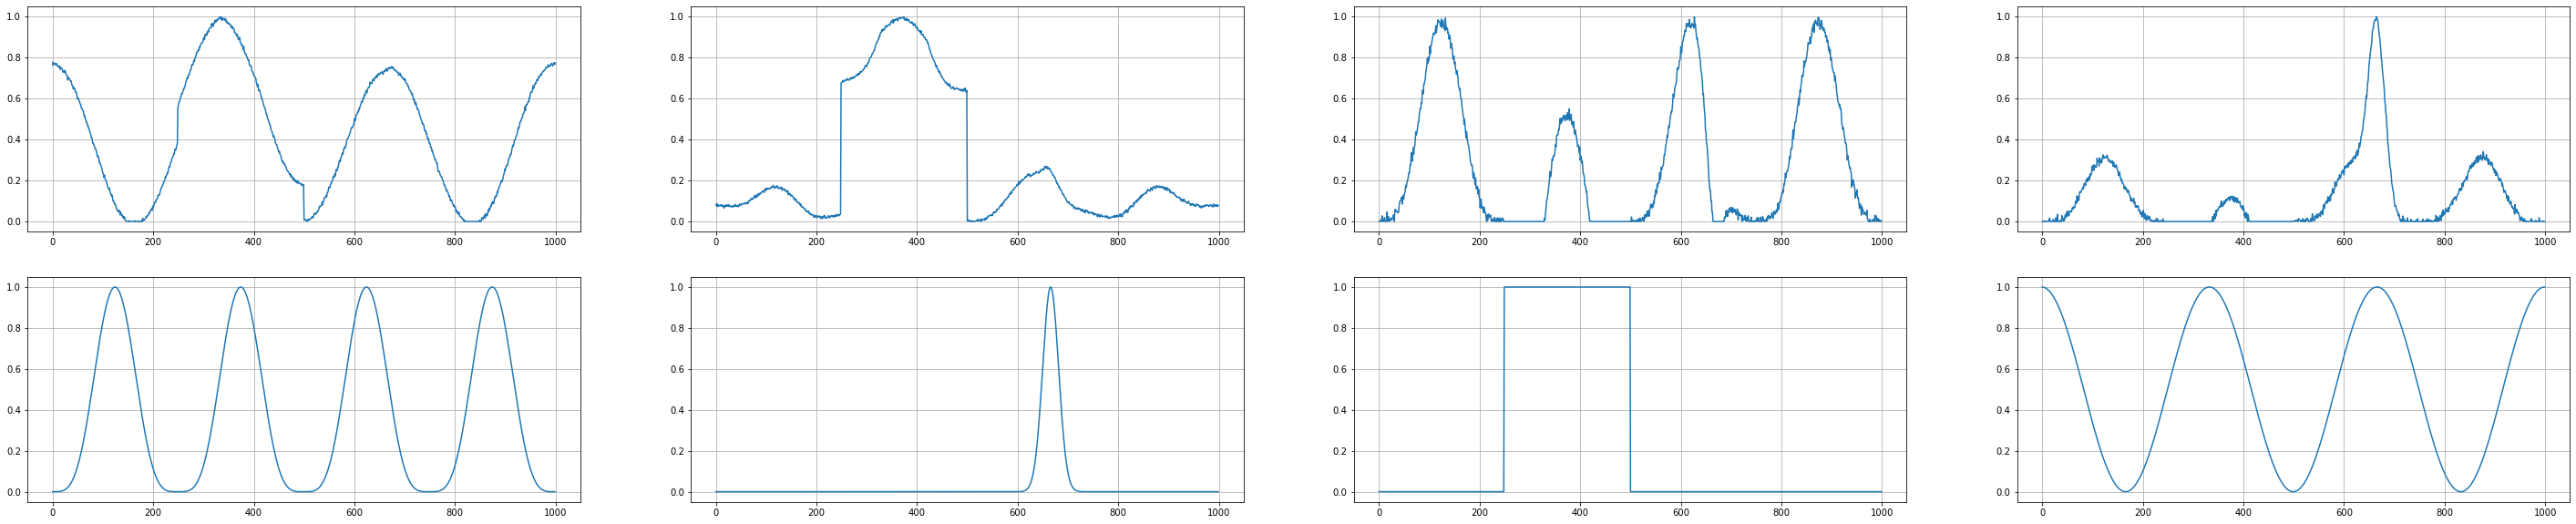

######     Hypotizing less sources (3<4)     ######
hypothesized sources:  3 real sources:  4 Iterations:  2
microphones:  20 times:  1000


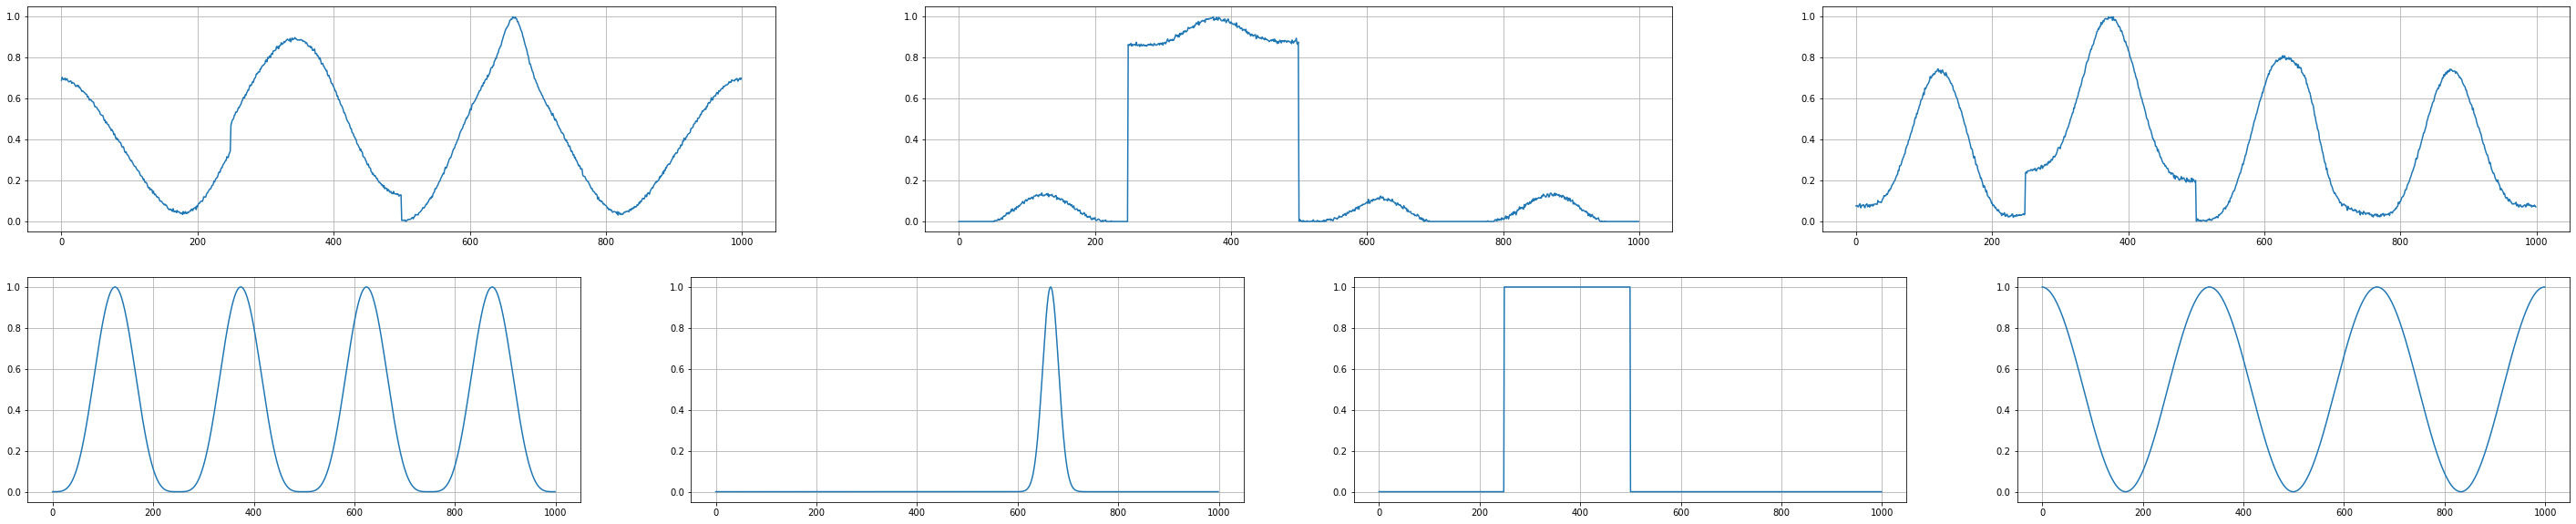

######     Hypotizing more sources (5>4)     ######
hypothesized sources:  5 real sources:  4 Iterations:  2
microphones:  20 times:  1000


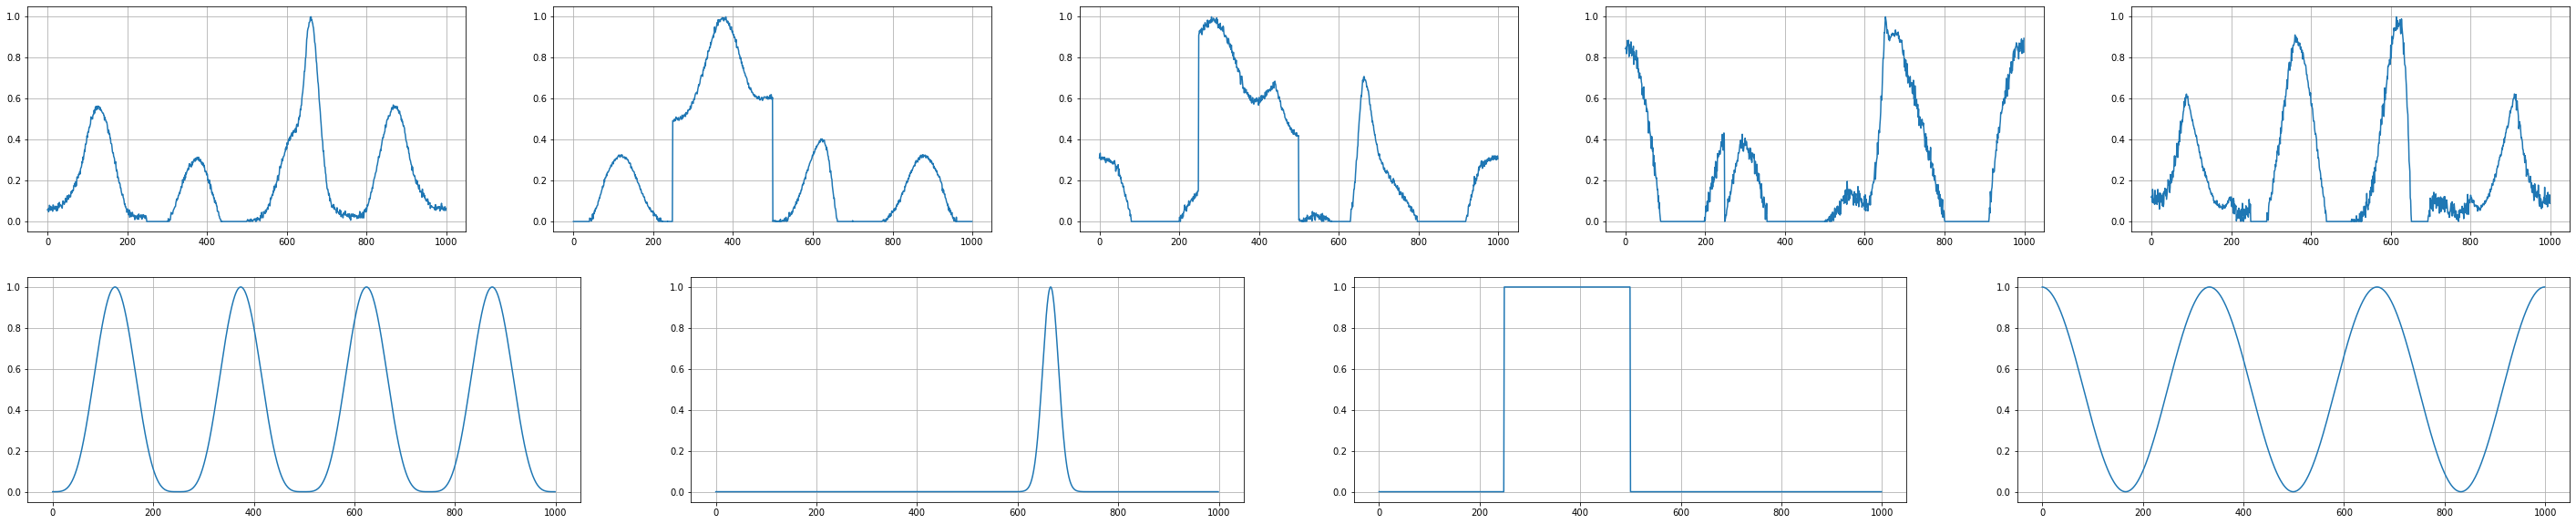

In [2]:
T1 = 2
T2 = 1000
T3 = 2000

x = [T1, T2, T3]

err4 = []

print("######     Hypotizing right number of sources (4=4)     ######")
err4.append(_NMF(4,T1))
print("######     Hypotizing less sources (3<4)     ######")
_NMF(3,T1)
print("######     Hypotizing more sources (5>4)     ######")
_NMF(5,T1)


######     Hypotizing right number of sources (4=4)     ######
hypothesized sources:  4 real sources:  4 Iterations:  1000
microphones:  20 times:  1000
Correct!


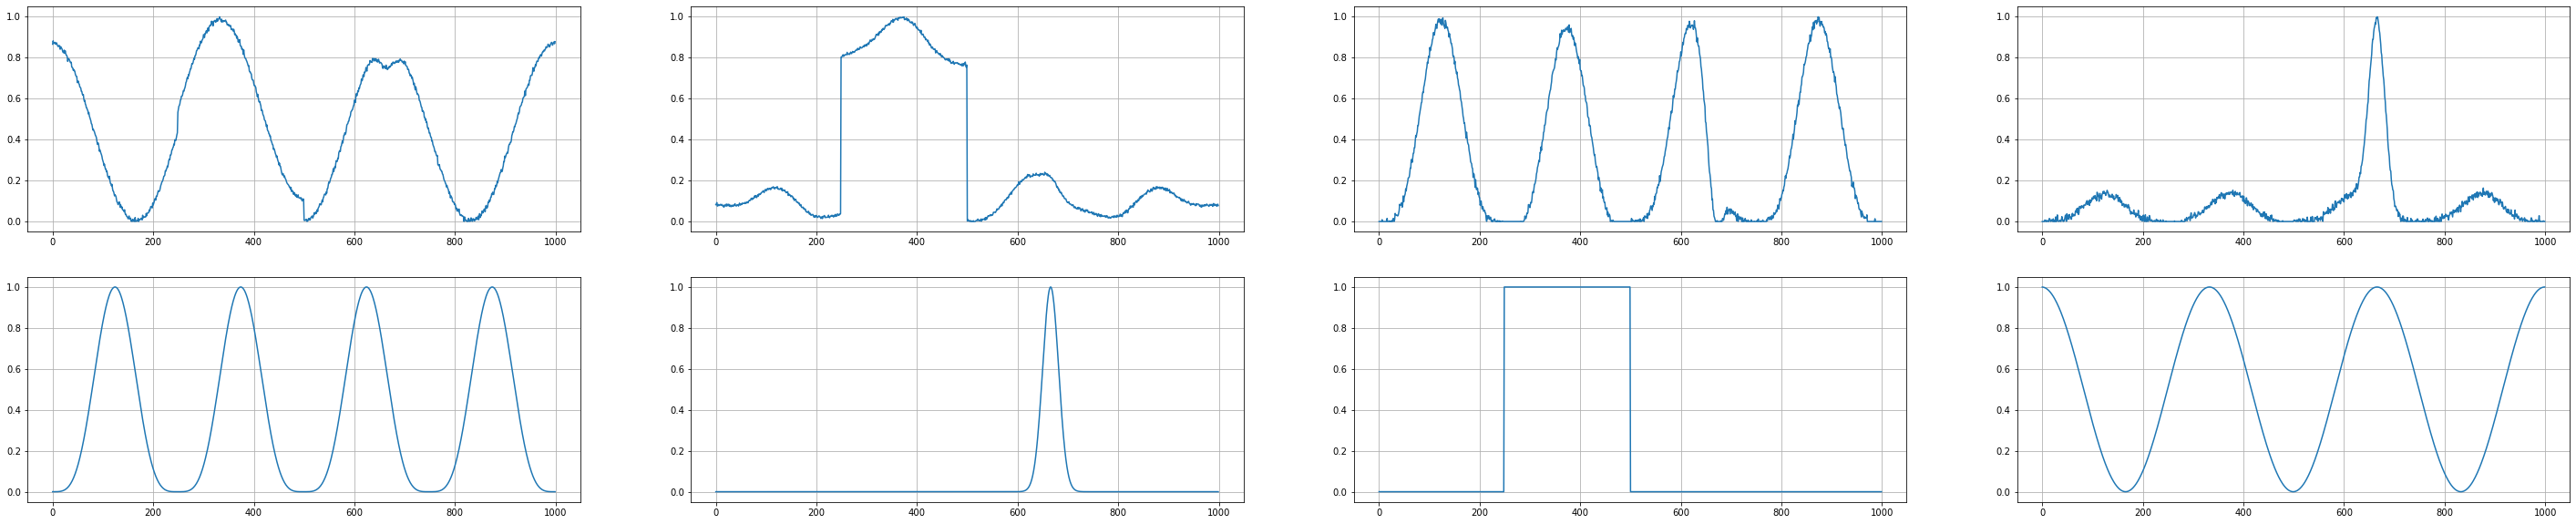

######     Hypotizing less sources (3<4)     ######
hypothesized sources:  3 real sources:  4 Iterations:  1000
microphones:  20 times:  1000
Correct!


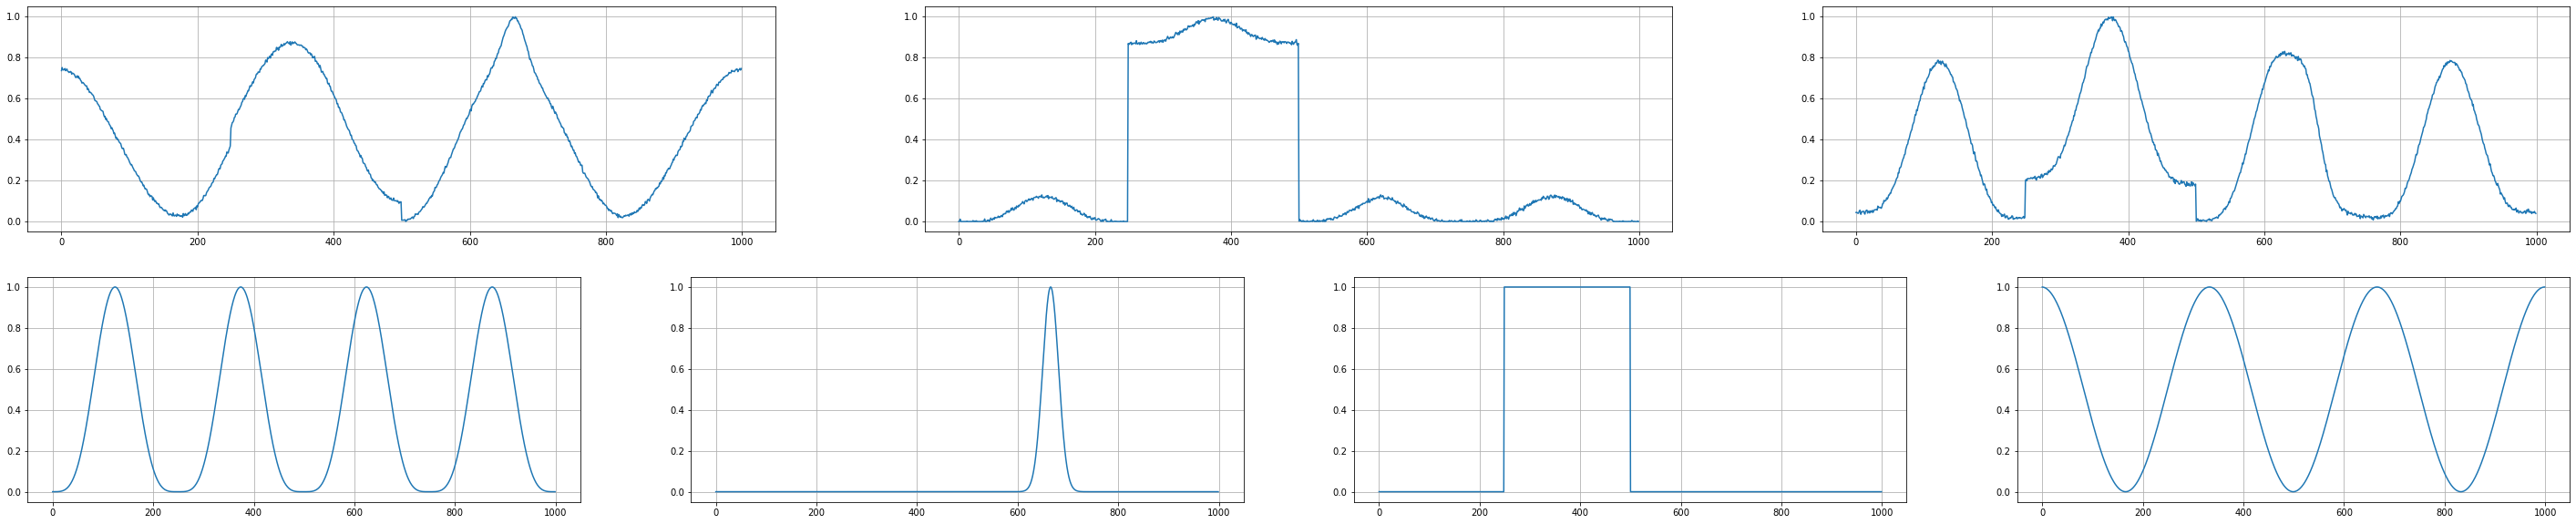

######     Hypotizing more sources (5>4)     ######
hypothesized sources:  5 real sources:  4 Iterations:  1000
microphones:  20 times:  1000
Correct!


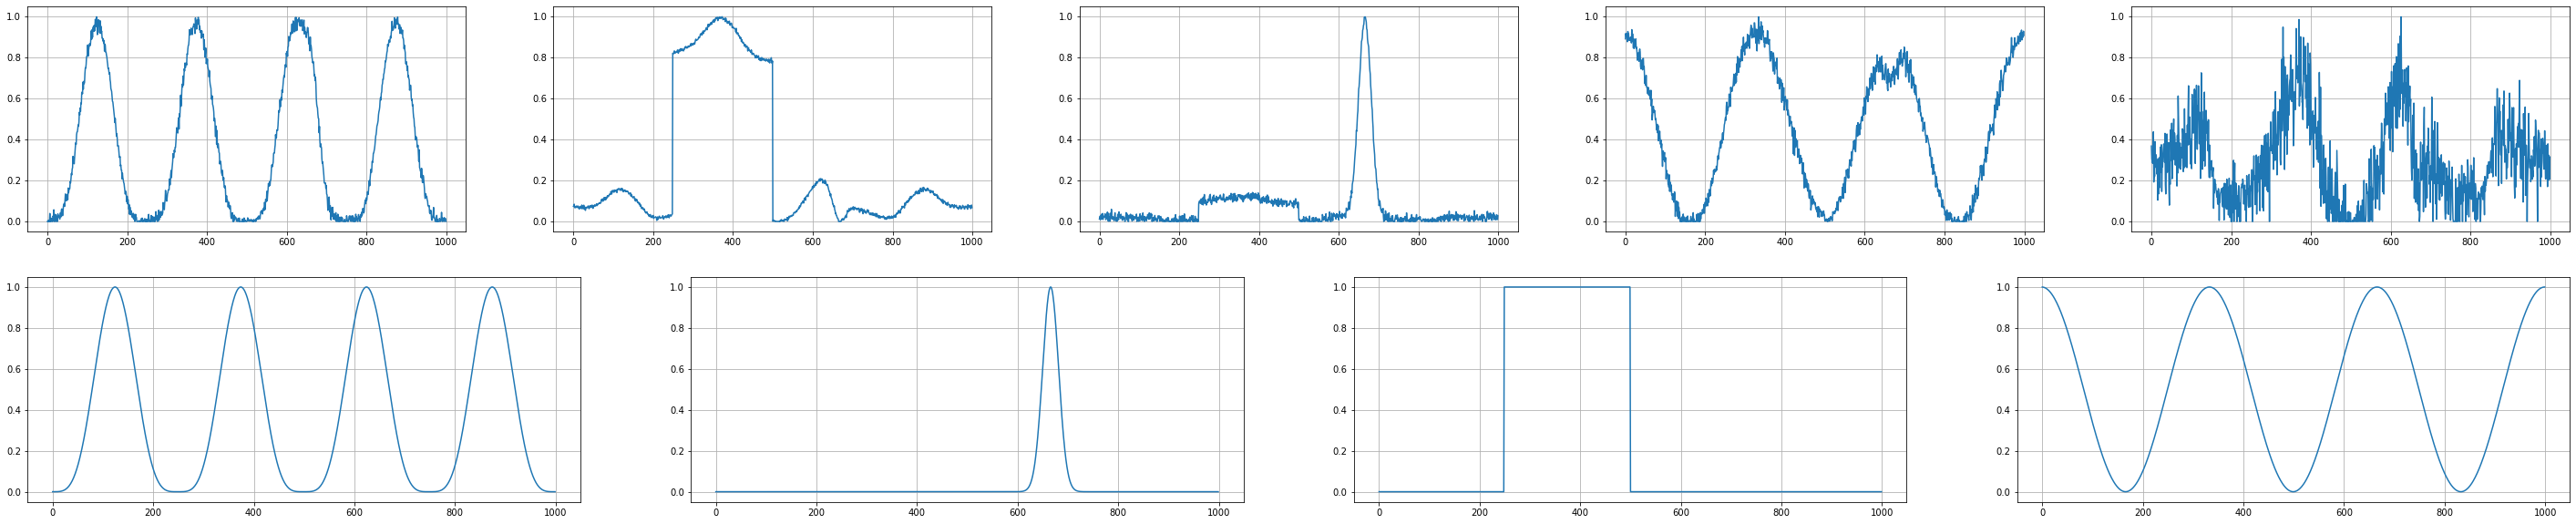

In [3]:
print("######     Hypotizing right number of sources (4=4)     ######")
err4.append(_NMF(4,T2))
print("######     Hypotizing less sources (3<4)     ######")
_NMF(3,T2)
print("######     Hypotizing more sources (5>4)     ######")
_NMF(5,T2)

######     Hypotizing right number of sources (4=4)     ######
hypothesized sources:  4 real sources:  4 Iterations:  2000
microphones:  20 times:  1000
Correct!


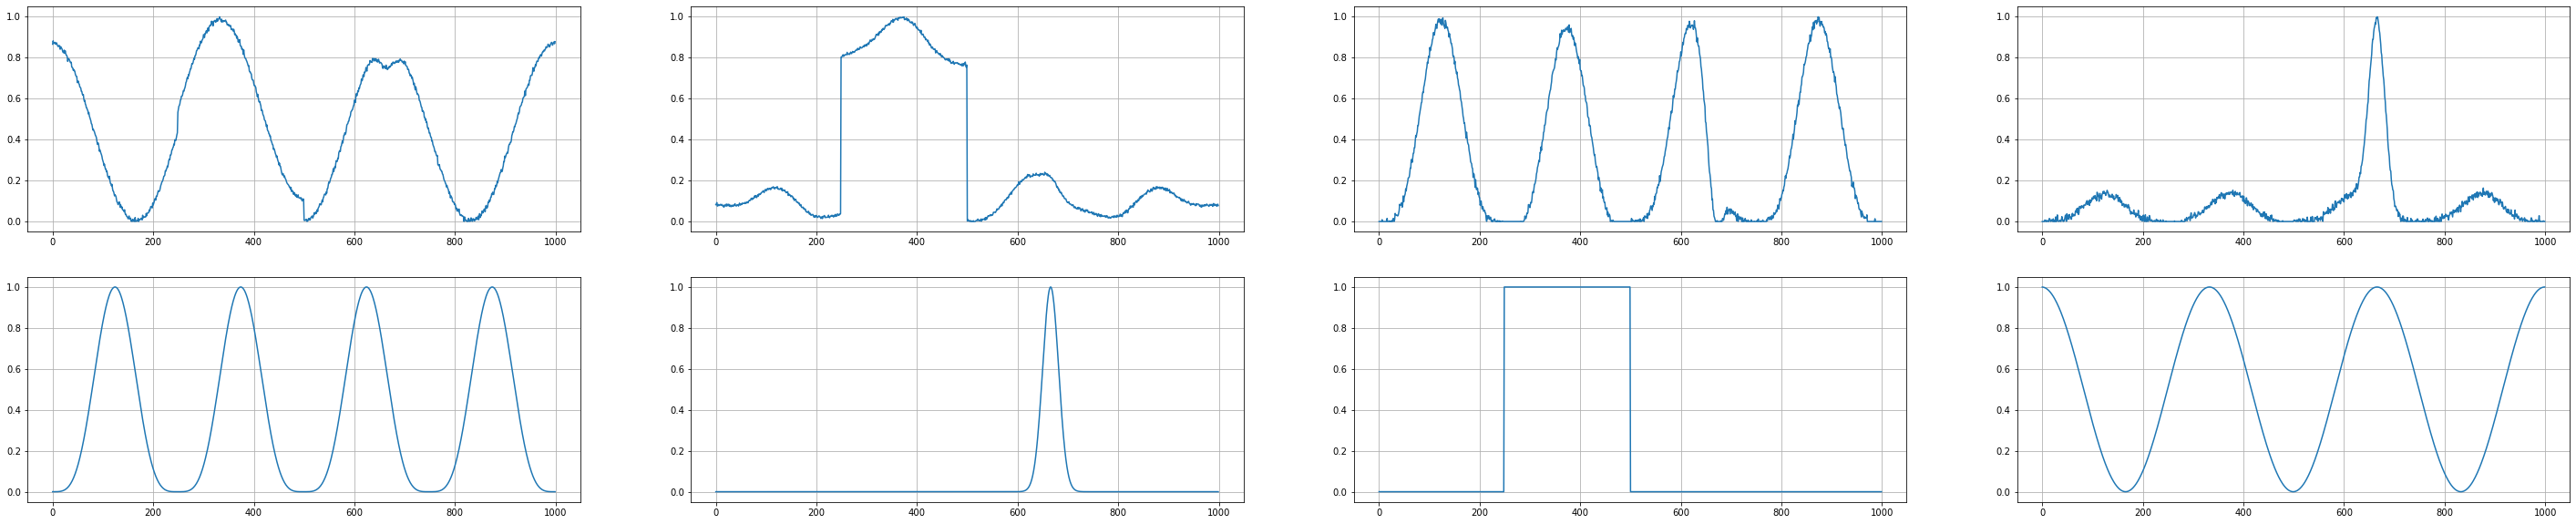

######     Hypotizing less sources (3<4)     ######
hypothesized sources:  3 real sources:  4 Iterations:  2000
microphones:  20 times:  1000
Correct!


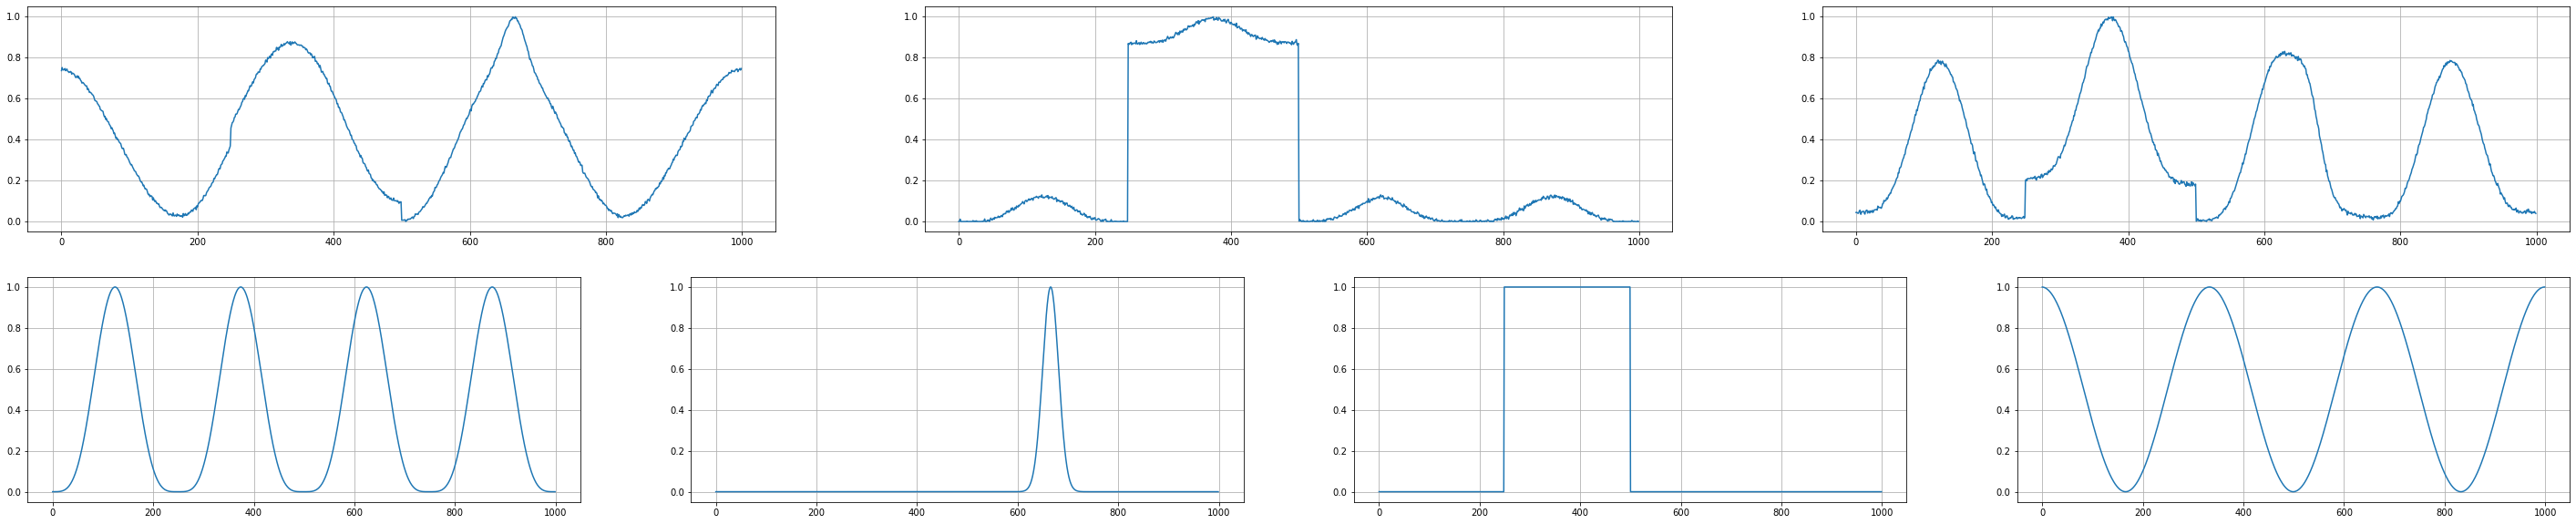

######     Hypotizing more sources (5>4)     ######
hypothesized sources:  5 real sources:  4 Iterations:  2000
microphones:  20 times:  1000
Correct!


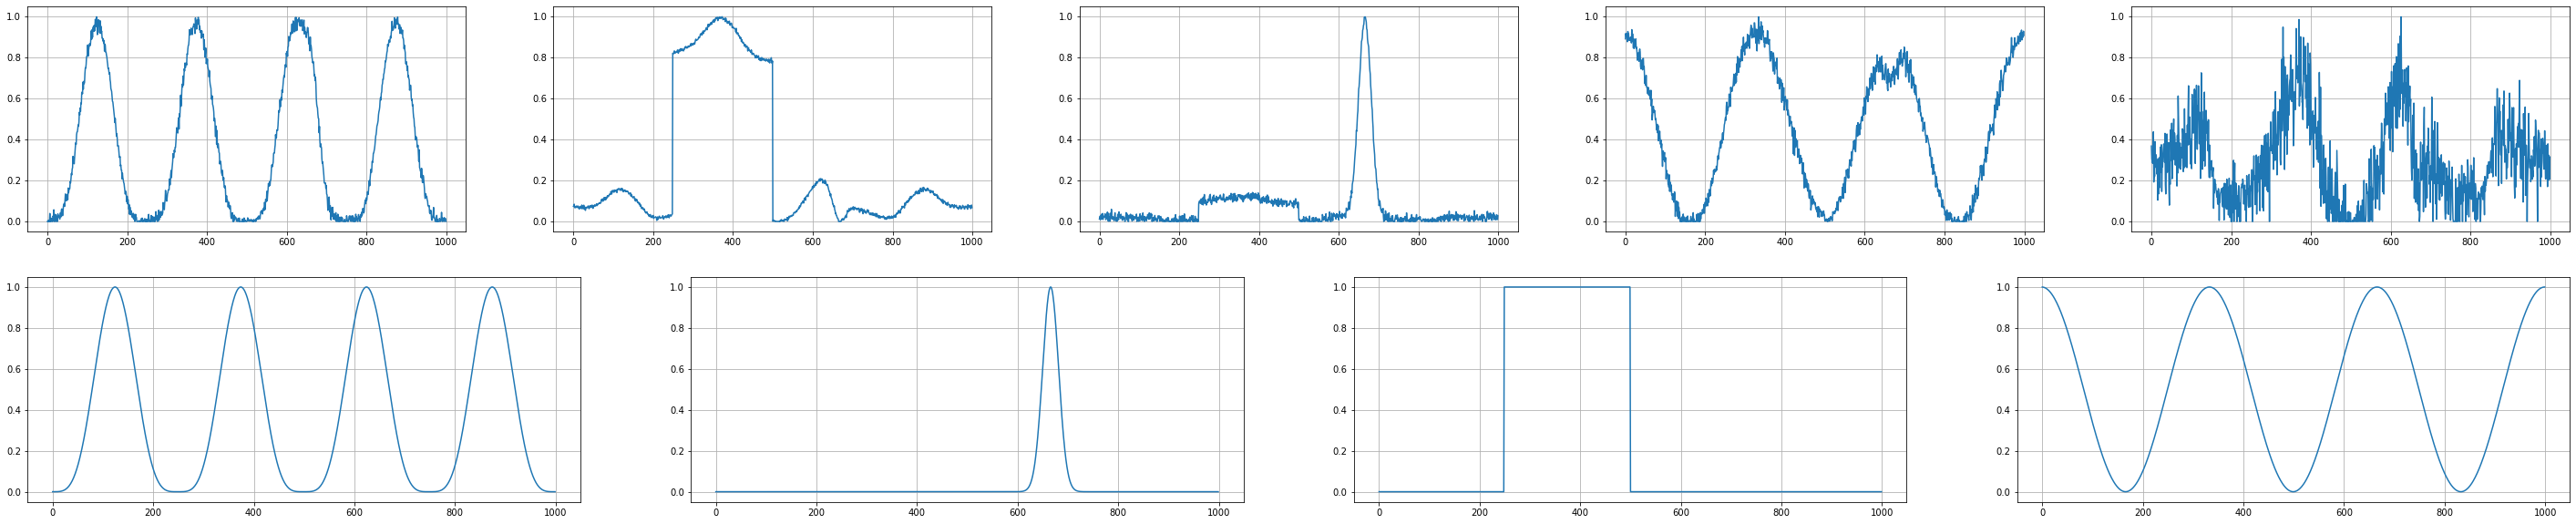

In [4]:
print("######     Hypotizing right number of sources (4=4)     ######")
_NMF(4,T3)
print("######     Hypotizing less sources (3<4)     ######")
_NMF(3,T3)
print("######     Hypotizing more sources (5>4)     ######")
_NMF(5,T3)

We can observe that if we use the right number of sources, there's a 1-to-1 correspondency between the original and the recovered sounds, even with a low noise. If, instead, we try to recover less/more signals we get signals that are a mixture between the original tracks. If we try to recover more tracks than the original ones, then we can easily see an oscillating behavior. The number of iterations doesn't make a big difference in the results, unless it is really small (just 2-3 iteration).  


With respect to the *SVD*, the *NMF*
     
     
     1. works just with matrixes of positive numbers
     2. has just positive numbers in W and H (here we used just H)
     2. is an iterative algorithm
     3. SVD is a more ‘insightful’ factorization technique - NMF gives only U and V matrices, but SVD gives a Sigma matrix also along with these two.Sigma gives us insights into the amount of information each eigen vector holds. Such info is not available in NMF.